In [51]:
import networkx as nx
import dynetx as dn
import ndlib.models.ModelConfig as mc
import ndlib.models.dynamic as dm
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

In [42]:
# Dynamic Network topology
dg = dn.DynGraph()

In [43]:
for t in range(0, 3):
    g = nx.erdos_renyi_graph(200, 0.05)
    dg.add_interactions_from(g.edges(), t)

In [46]:
print(nx.info(dg))

Name: 
Type: DynGraph
Number of nodes: 200
Number of edges: 2845
Average degree:  28.4500


In [48]:
model = dm.DynSIRModel(dg)
config = mc.Configuration()
config.add_model_parameter("fraction_infected", 0.05)
config.add_model_parameter("beta", 0.001)
config.add_model_parameter("gamma", 0.01)
model.set_initial_status(config)

In [49]:
# Simulate snapshot based execution
iterations = model.execute_snapshots()

In [50]:
trends = model.build_trends(iterations)

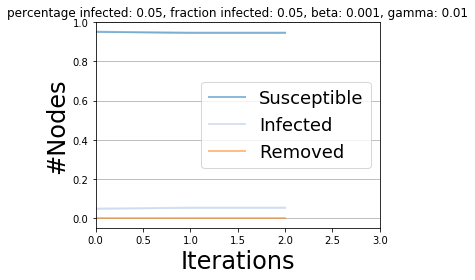

In [52]:
DiffusionTrend(model, trends).plot()